<a href="https://colab.research.google.com/github/ykato27/DQN/blob/main/rl_pybullet_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyBullet on Google Colab

必要なライブラリのインストール

In [1]:
!apt -qq update
!apt -qq -y install libnvtoolsext1
!apt -qq -y install xvfb freeglut3-dev ffmpeg
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay
!pip -q install pybullet

58 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  libnvtoolsext1
0 upgraded, 1 newly installed, 0 to remove and 58 not upgraded.
Need to get 31.3 kB of archives.
After this operation, 147 kB of additional disk space will be used.
Selecting previously unselected package libnvtoolsext1:amd64.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../libnvtoolsext1_9.1.85-3ubuntu1_amd64.deb ...
Unpacking libnvtoolsext1:amd64 (9.1.85-3ubuntu1) ...
Setting up libnvtoolsext1:amd64 (9.1.85-3ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

freeglut3-dev is already the newest version (2.8.1-3).
freeglut3-dev set to manually installed.
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 ne

Virtual Displayの設定

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
#os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

PyBullet

In [3]:
import gym
import pybullet_envs

In [4]:
# 試行回数
EPISODE_NUMB = 3

# 最大試行時間
MAX_TIME = 5

In [5]:
env = gym.make('AntBulletEnv-v0')

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [6]:
frames = []
for i in range(EPISODE_NUMB):
    observation = env.reset()  # reset for each new trial
    done = False
    total_reward = 0
    total_time = 0
    while not done and total_time < MAX_TIME: # run for 100 timesteps or until done, whichever is first
        frames.append(env.render(mode = 'rgb_array'))
        action = env.action_space.sample()  # select a random action (see https://github.com/openai/gym/wiki/CartPole-v1)
        observation, reward, done, _ = env.step(action)
        total_reward += reward
        total_time += 1
    print('test episode:', i, 'reward:', total_reward, 'time:', total_time)
 
env.render()

test episode: 0 reward: 2.1603654042381093 time: 5
test episode: 1 reward: 2.118797154455388 time: 5
test episode: 2 reward: 2.2665308666051716 time: 5


array([], dtype=float64)

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

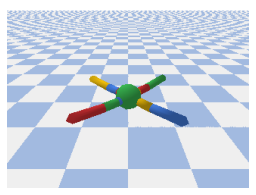

In [8]:
plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

In [9]:
frames = []
for i in range(EPISODE_NUMB):
    observation = env.reset()  # reset for each new trial
    done = False
    total_reward = 0
    total_time = 0
    while not done and total_time < MAX_TIME: # run for 100 timesteps or until done, whichever is first
        frames.append(env.render(mode = 'rgb_array'))
        action = env.action_space.sample()  # select a random action (see https://github.com/openai/gym/wiki/CartPole-v1)
        observation, reward, done, _ = env.step(action)
        total_reward += reward
        total_time += 1
    print('test episode:', i, 'reward:', total_reward, 'time:', total_time)
 
env.render()

test episode: 0 reward: 2.4444398274659758 time: 5
test episode: 1 reward: 1.943171635172621 time: 5
test episode: 2 reward: 1.2382478125233318 time: 5


array([], dtype=float64)